### Índice
1. [Descripción de los datos ](#id1)
2. [Outliers](#id2)
3. [Distribución de los datos](#id3)
4. [Métricas y visualización de datos](#id4)
5. [Conclusión](#id5)

In [1]:
# se importa las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('datasets/monedas_markets.csv', delimiter=',')

In [3]:
df.head()

,Unnamed: 0,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,...,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,roi.times,roi.currency,roi.percentage
0,0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,25993.000000,505963641716,1,5.458674e+11,1.009099e+10,...,-62.34951,2021-11-10T14:24:11.849Z,67.810000,38236.63991,2013-07-06T00:00:00.000Z,NaN,2023-08-22T15:35:22.094Z,NaN,NaN,NaN
1,1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1656.870000,199133921876,2,1.991339e+11,5.545958e+09,...,-66.06229,2021-11-10T14:24:19.604Z,0.432979,382267.41766,2015-10-20T00:00:00.000Z,NaN,2023-08-22T15:35:23.920Z,84.225683,btc,8422.568328
2,2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999464,82799734587,3,8.279973e+10,1.627232e+10,...,-24.44698,2018-07-24T00:00:00.000Z,0.572521,74.60294,2015-03-02T00:00:00.000Z,NaN,2023-08-22T15:35:01.482Z,NaN,NaN,NaN
3,3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,207.770000,31928758385,4,4.150469e+10,5.922831e+08,...,-69.78390,2021-05-10T07:24:17.097Z,0.039818,520711.31177,2017-10-19T00:00:00.000Z,NaN,2023-08-22T15:35:24.247Z,NaN,NaN,NaN
4,4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.514750,27172484049,5,5.142226e+10,1.073134e+09,...,-84.88099,2018-01-07T00:00:00.000Z,0.002686,19027.79333,2014-05-22T00:00:00.000Z,NaN,2023-08-22T15:35:24.001Z,NaN,NaN,NaN


In [4]:
# se averigua cúantos registros hay: 4312 registros
df.shape[0]

100

In [5]:
# Se observa por columna: la cantidad de registro, el tipo de dato y si tiene valores nulos o no. 
# También se observa el uso de memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        100 non-null    int64  
 1   id                                100 non-null    object 
 2   symbol                            100 non-null    object 
 3   name                              100 non-null    object 
 4   image                             100 non-null    object 
 5   current_price                     100 non-null    float64
 6   market_cap                        100 non-null    int64  
 7   market_cap_rank                   100 non-null    int64  
 8   fully_diluted_valuation           94 non-null     float64
 9   total_volume                      100 non-null    float64
 10  high_24h                          100 non-null    float64
 11  low_24h                           100 non-null    float64
 12  price_cha

In [6]:
df.describe()

,Unnamed: 0,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,...,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage,roi,roi.times,roi.percentage
count,100.000000,1.000000e+02,1.000000e+02,100.000000,9.400000e+01,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,...,1.000000e+02,9.400000e+01,5.800000e+01,100.000000,100.000000,1.000000e+02,1.000000e+02,0.0,24.000000,24.000000
mean,49.500000,6.474815e+02,1.037740e+10,50.500000,1.259193e+10,4.465050e+08,6.536391e+02,6.454706e+02,1.443897,-0.275606,...,1.987495e+13,2.595158e+13,2.469344e+13,1775.673868,-74.343440,8.906853e+01,1.684979e+05,NaN,31.088414,3108.841447
std,29.011492,3.664769e+03,5.458258e+10,29.011492,6.011866e+10,2.004084e+09,3.698682e+03,3.656916e+03,8.133312,1.635724,...,1.185096e+14,1.500620e+14,1.403101e+14,9838.972160,26.991552,3.953029e+02,1.401894e+06,NaN,56.246683,5624.668254
min,0.000000,4.120750e-07,3.523464e+08,1.000000,3.610210e+08,4.941880e+03,4.168990e-07,4.112940e-07,-0.827040,-6.909750,...,1.623053e+05,1.623053e+05,1.623053e+05,0.000003,-99.999950,5.636600e-11,1.317600e-01,NaN,-0.960089,-96.008919
25%,24.750000,3.164748e-01,4.904774e+08,25.750000,6.553787e+08,7.341477e+06,3.225227e-01,3.137115e-01,-0.009624,-0.797138,...,1.283266e+08,1.656546e+08,2.002625e+08,1.327500,-94.058262,1.800944e-02,5.191451e+01,NaN,1.748685,174.868484
50%,49.500000,9.999945e-01,7.504002e+08,50.500000,1.190884e+09,2.407645e+07,1.003500e+00,9.982570e-01,-0.000078,-0.136000,...,7.802452e+08,1.000000e+09,1.000000e+09,9.320000,-86.196370,3.613790e-01,3.623279e+02,NaN,3.242206,324.220611
75%,74.250000,7.022500e+00,2.870137e+09,75.250000,5.368744e+09,9.987102e+07,7.232500e+00,6.990000e+00,0.005299,0.425785,...,3.568446e+09,9.722222e+09,9.722222e+09,103.107500,-65.882380,9.166813e-01,4.116721e+03,NaN,34.584194,3458.419442
max,99.000000,2.599800e+04,5.059636e+11,100.000000,5.458674e+11,1.627232e+10,2.626600e+04,2.596500e+04,76.310000,4.069700,...,9.514217e+14,9.999851e+14,9.900000e+14,70643.000000,-4.516990,3.139170e+03,1.398125e+07,NaN,203.046798,20304.679802


In [7]:
# se averigua si hay nulos --> no hay nulos.
df[df.duplicated(keep=False)]

,Unnamed: 0,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,...,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,roi.times,roi.currency,roi.percentage


In [8]:
# Se averigua en que columnas se tiene valores nulos:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
symbol                                0
name                                  0
image                                 0
current_price                         0
market_cap                            0
market_cap_rank                       0
fully_diluted_valuation               6
total_volume                          0
high_24h                              0
low_24h                               0
price_change_24h                      0
price_change_percentage_24h           0
market_cap_change_24h                 0
market_cap_change_percentage_24h      0
circulating_supply                    0
total_supply                          6
max_supply                           42
ath                                   0
ath_change_percentage                 0
ath_date                              0
atl                                   0
atl_change_percentage                 0
atl_date                              0


En relación a la columna **fully_diluted_valuation** tiene 6 valores nulos. El FDV de una cripto se evalua cuando la cantidad máxima de una moneda está en circulación, pueden pasar 3, 5, 10 o más años hasta que se alcance el FDV de una cripto, según el calendario de emisión. Este es el motivo porque algunas criptos no tienen FDV,las cuales son:  

In [14]:
print(df[df['fully_diluted_valuation'].isnull()])   

    Unnamed: 0          id symbol        name  \
26          26      monero    xmr      Monero   
29          29      cosmos   atom  Cosmos Hub   
51          51        usdd   usdd        USDD   
57          57       tezos    xtz       Tezos   
58          58         eos    eos         EOS   
85          85  klay-token   klay      Klaytn   

                                                image  current_price  \
26  https://assets.coingecko.com/coins/images/69/l...     147.840000   
29  https://assets.coingecko.com/coins/images/1481...       7.350000   
51  https://assets.coingecko.com/coins/images/2538...       0.997176   
57  https://assets.coingecko.com/coins/images/976/...       0.682816   
58  https://assets.coingecko.com/coins/images/738/...       0.572817   
85  https://assets.coingecko.com/coins/images/9672...       0.138020   

    market_cap  market_cap_rank  fully_diluted_valuation  total_volume  ...  \
26  2678535939               27                      NaN    69299020.0  

Se recuperan las criptos con mayor cotización en el mercado

In [23]:
df_ordenado_precio = df.sort_values(by='market_cap_rank', ascending=True)

# Obtener los primeros 10 registros
top_10 = df_ordenado_precio.head(10)

print(top_10)

   Unnamed: 0            id symbol               name  \
0           0       bitcoin    btc            Bitcoin   
1           1      ethereum    eth           Ethereum   
2           2        tether   usdt             Tether   
3           3   binancecoin    bnb                BNB   
4           4        ripple    xrp                XRP   
5           5      usd-coin   usdc           USD Coin   
6           6  staked-ether  steth  Lido Staked Ether   
7           7       cardano    ada            Cardano   
8           8      dogecoin   doge           Dogecoin   
9           9        solana    sol             Solana   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...   25993.000000   
1  https://assets.coingecko.com/coins/images/279/...    1656.870000   
2  https://assets.coingecko.com/coins/images/325/...       0.999464   
3  https://assets.coingecko.com/coins/images/825/...     207.770000   
4  https://assets

Se entiende que en este top 10 de criptos se hallan las monedas mejor establecidas y de mayor influencia en el mercado en comparación el resto de las criptomonedas. Por ejemplo, si una criptomoneda tiene un "market_cap_rank" de 1, significa que es la criptomoneda con la mayor capitalización de mercado en ese momento. Si tiene un "market_cap_rank" de 10, significa que ocupa la décima posición en términos de capitalización de mercado entre todas las criptomonedas. Para este caso el Bitcoin lidera el primer lugar mientras que solana está en la posicion 10.

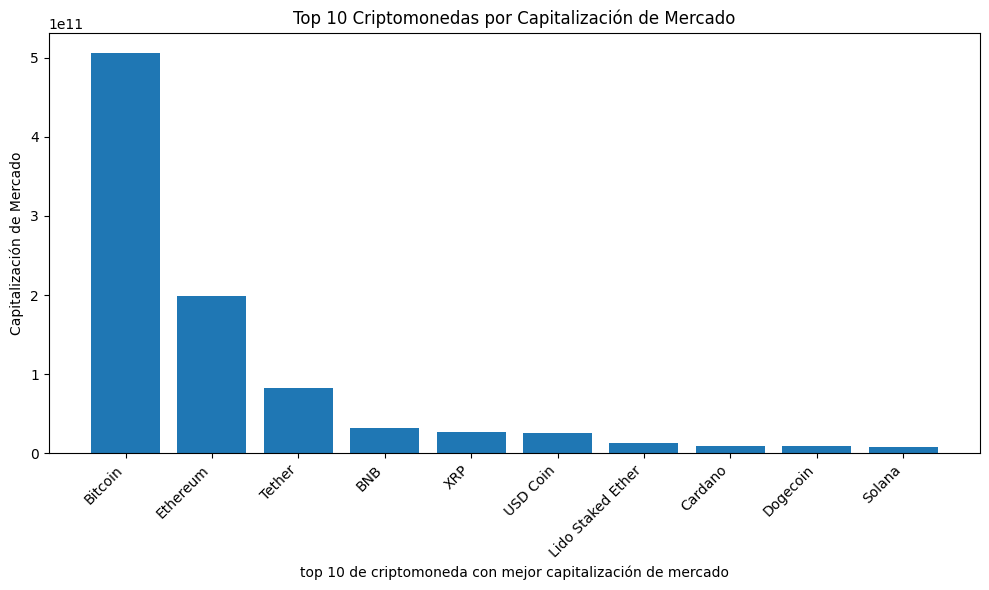

In [26]:
# Se crea un grafico de barras pero usando la columna  market_cap
plt.figure(figsize=(10, 6))
plt.bar(top_10['name'], top_10['market_cap'])
plt.xlabel('top 10 de criptomoneda con mejor capitalización de mercado')
plt.ylabel('Capitalización de Mercado')
plt.title('Top 10 Criptomonedas por Capitalización de Mercado')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

Estas monedas van a ser objeto de estudio en todo el EDA.

VER   se debe ver esos campos nulos

Diccionario de Datos
market_cap
| Columna | Descripción  |
|:------------- |:-------------| 
| id         | Clave primaria de la moneda          | 
| symb         | Simbolo de la moneda         |
| name         | Nombre de la criptomoneda          |
| image         | url donde se halla una imagen ilustrativa que representa la cripto          |
| current_price | Precio actual         |
| market_cap         | Capitalización del mercado. Precio de la Criptomoneda × Cantidad Total de Criptomoneda en Circulación. Donde "Precio de la Criptomoneda" es el precio actual de una unidad de la criptomoneda y "Cantidad Total de Criptomoneda en Circulación" es la cantidad total de unidades de esa criptomoneda que están siendo negociadas en el mercado.          |
| market_cap_rank         | El rango de capitalización de mercado de una criptomoneda se refiere a la posición relativa de esa criptomoneda en comparación con otras criptomonedas en función de su capitalización de mercado.         |
| fully_diluted_valuation         |  La valoración totalmente diluida es una representación estadística del valor máximo de un proyecto de criptomoneda, suponiendo que todos sus tokens ya estén en circulación. FDV = Precio actual x Cantidad máxima (o cantidad total si la cantidad máxima no es válida). La capitalización de mercado (valoración) si la cantidad máxima de una moneda está en circulación. Tenga en cuenta que pueden pasar 3, 5, 10 o más años hasta que se alcance el FDV según el calendario de emisión.     |
| total_volume         |Volumen de comercio      |
| high_24h         |Máximo en 24 |
| low_24h         | Mínimo en 24 |
| price_change_24h              | |
| price_change_percentage_24h         | |
| market_cap_change_24h         | |
| market_cap_change_percentage_24h         | |

                 
    

### 6. Fuentes adicionales <a name="id6"></a>
Se consultaron las siguientes fuentes adicionales al análisis exploratorio de datos.

[^1]: Estas son las 10 criptomonedas más valiosas del mundo durante mayo https://elceo.com/mercados/estas-son-las-10-criptomonedas-mas-valiosas-del-mundo-durante-mayo/